In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import skimage
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage.measure import regionprops
from skimage.measure import centroid

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Felzenszwalb number of segments: 74
SLIC number of segments: 10
Quickshift number of segments: 366
Watershed number of segments: 240


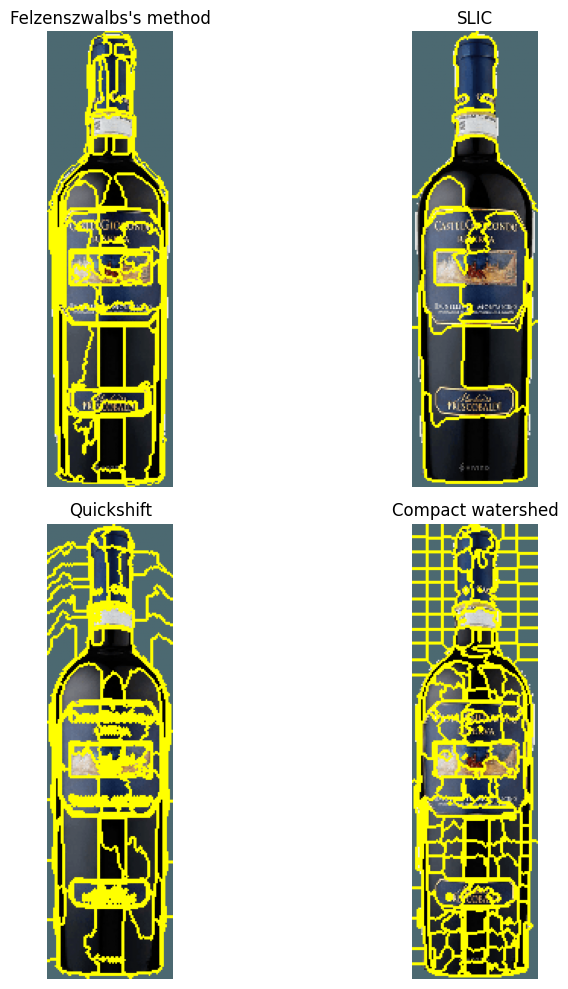

[46.59379310344828, 49.42411390487731, 26.447841726618705, 116.03107019562715, 145.81699346405227, 158.06892818477084, 222.22326807228916, 214.55349576271186, 257.5459272097054, 273.7194663017448] 
 [14.147586206896552, 64.91426840351409, 41.41996402877698, 42.975258918296895, 21.668534080298787, 50.79538072897871, 32.35805722891566, 56.17478813559322, 40.9896013864818, 41.062949024974344]


In [ ]:


filename = "/content/content/images/BrunellodiMontalcinoRiserva2010.png"
img = img_as_float(skimage.io.imread(filename)[::2, ::2])

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=10, compactness=10, sigma=1, start_label=1)
regions = regionprops(segments_slic)
cx = []
cy = []
for props in regions:
    cx.append(props.centroid[0])
    cy.append(props.centroid[1])  # centroid coordinates
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')
print(f'Watershed number of segments: {len(np.unique(segments_watershed))}')

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()
print(cx,"\n",cy)

In [ ]:
print(sum(cx)/len(cx), sum(cy)/len(cy))

151.0424897925846 40.65063881427271


In [ ]:
image = np.zeros((20, 20), dtype=np.float64)

image[13:17, 13:17] = 0.5

image[10:12, 10:12] = 1

centroid(image)

array([13.16666667, 13.16666667])

In [ ]:
name = "/content/ZizzoloBolgheri2021.png"

In [ ]:
img = img_as_float(skimage.io.imread(name)[::2, ::2])

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
segments_slic = slic(img, n_segments=10, compactness=10, sigma=1, start_label=1)
regions = regionprops(segments_slic)
cx = []
cy = []
for props in regions:
    cx.append(props.centroid[0])
    cy.append(props.centroid[1])

cen = centroid(img)
print(cen, sum(cx)/len(cx), sum(cy)/len(cy))

[130.66849398  34.67961078   0.99703686] 151.6705740885277 39.390138438220596


In [ ]:
def phys_bal_slic(name):
  img = img_as_float(skimage.io.imread(name)[::2, ::2])
  cen = centroid(img)
  return abs(img.shape[0]/2 - cen[0]), abs(img.shape[1]/2 - cen[1])

In [ ]:
a,b = phys_bal_slic(name)
print(b,a)

4.820389221155317 19.33150602427881


In [ ]:
img.shape

(300, 79, 3)

In [ ]:
!unzip images.zip

Archive:  images.zip
   creating: content/images/
  inflating: content/images/TimorassoColliTortonesi2019.png  
 extracting: content/images/LaLusAlbarossa2019.png  
  inflating: content/images/BaroloArione2018.png  
 extracting: content/images/BaroloCiabotMentin2012.png  
  inflating: content/images/PoraBarbaresco2017.png  
  inflating: content/images/Barolo1942.png  
 extracting: content/images/BarbarescoAsili2010.png  
  inflating: content/images/Barberad'Asti2020.png  
  inflating: content/images/Barolo1987.png  
 extracting: content/images/PoggiodelleAmareneBarberaColliTortonesi2019.png  
  inflating: content/images/BaroloRavera2012.png  
  inflating: content/images/ConteisaLanghe2014.png  
  inflating: content/images/IlCastelloGavi2020.png  
 extracting: content/images/Rocchedell'AnnunziataTorriglioneBarolo2006.png  
  inflating: content/images/UcelineMonferratoRosso2016.png  
  inflating: content/images/GiachiniBarolo2019.png  
 extracting: content/images/VürsùBarbarescoGallina20

In [ ]:
import pandas as pd

In [ ]:
dft = pd.read_csv("image_features_tuscany.csv")
dft.head(3)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,...,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,8.665253e+22,72.145970,101.875833,1.0,0.105306,22.690002,...,1.422962e-09,28628.411530,95274.532901,14.256713,3.174525,150.848397,0.355158,724.5,0.0,4.028714
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,5.296501e+121,74.638879,83.735040,1.0,0.072747,27.365681,...,4.251168e-07,10180.439444,75725.680030,20.102225,2.435457,445.554545,0.614333,800.0,4.7,4.386521
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,6.119993e+03,78.032288,83.519130,1.0,0.058571,39.570771,...,1.177539e-04,17511.647133,100451.267961,17.164650,4.139644,299.121843,0.346605,560.0,4.7,4.678044


In [ ]:
names = dfp.image_names.to_list()

In [ ]:
pbv = []
pbh = []
count = 0
for name in names:
  v, h = phys_bal_slic("/content/content/images/" + name)
  pbv.append(v)
  pbh.append(h)
  if count % 100 == 0:
    print(count)
  count += 1

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300


In [ ]:
df["physical_balance_vert"] = pbv
df["physical_balance_hor"] = pbh
df.head(3)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,8.665253e+22,72.145970,101.875833,1.0,0.105306,22.690002,1,1.422962e-09,28628.411530,95274.532901,14.256713,3.174525
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,5.296501e+121,74.638879,83.735040,1.0,0.072747,27.365681,1,4.251168e-07,10180.439444,75725.680030,20.102225,2.435457
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,6.119993e+03,78.032288,83.519130,1.0,0.058571,39.570771,1,1.177539e-04,17511.647133,100451.267961,17.164650,4.139644


In [ ]:
df.to_csv("image_features.csv", index=False)

In [ ]:
dfp = pd.read_csv("image_features_piemonte.csv")
dfp.head(3)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,...,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,5.738831e+03,89.585949,150.137468,1.000000,0.064641,48.594532,...,4.263727e-07,27407.775897,70753.508565,7.012457,0.342364,267.794684,0.376551,3.25,3.3,3.295238
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,2.584170e+189,96.286447,79.322088,1.000000,0.038956,21.756336,...,6.899074e-11,13100.455965,108044.819368,17.422752,2.892335,224.110526,0.601842,5.50,3.9,3.891083
2,Il Sendallo Chardonnay 2022,https://www.vivino.com/IT/en/cantine-povero-as...,IlSendalloChardonnay2022.png,https://images.vivino.com/thumbs/CdCmqwMpSXmAm...,6.551379e+03,80.487722,134.599357,0.905882,0.094631,63.609181,...,4.130261e-08,38979.078914,114233.925654,1.810794,0.281566,189.244135,0.572162,5.80,0.0,3.648175


In [ ]:
im_names = dfp.image_names.to_list()
names_p = []
for name in im_names:
  name = name[7:]
  names_p.append(name)
len(names_p)

5933

In [ ]:
names_p = dfp.image_names.to_list()

In [ ]:
dfp.image_names = names_p
dfp.head(4)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,5.738831e+03,89.585949,150.137468,1.000000,0.064641,48.594532,1,4.263727e-07,27407.775897,70753.508565,7.012457,0.342364
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,2.584170e+189,96.286447,79.322088,1.000000,0.038956,21.756336,1,6.899074e-11,13100.455965,108044.819368,17.422752,2.892335
2,Il Sendallo Chardonnay 2022,https://www.vivino.com/IT/en/cantine-povero-as...,IlSendalloChardonnay2022.png,https://images.vivino.com/thumbs/CdCmqwMpSXmAm...,6.551379e+03,80.487722,134.599357,0.905882,0.094631,63.609181,1,4.130261e-08,38979.078914,114233.925654,1.810794,0.281566
3,Buon Paggio Grignolino Piemonte 2022,https://www.vivino.com/IT/en/cantine-povero-as...,BuonPaggioGrignolinoPiemonte2022.png,https://images.vivino.com/thumbs/59Y0FaE4SAmup...,7.134342e+03,52.777236,107.454810,0.958848,0.062669,27.095146,1,5.161947e-05,44844.128333,79408.001951,6.108936,0.951504


In [ ]:
pbv = []
pbh = []
count = 0
for name in names_p:
  v, h = phys_bal_slic("/content/content/images_piemonte/" + name)
  pbv.append(v)
  pbh.append(h)
  if count % 100 == 0:
    print(count)
  count += 1

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


In [ ]:
dfp["physical_balance_vert"] = pbv
dfp["physical_balance_hor"] = pbh
dfp.head(3)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,5.738831e+03,89.585949,150.137468,1.000000,0.064641,48.594532,1,4.263727e-07,27407.775897,70753.508565,7.012457,0.342364
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,2.584170e+189,96.286447,79.322088,1.000000,0.038956,21.756336,1,6.899074e-11,13100.455965,108044.819368,17.422752,2.892335
2,Il Sendallo Chardonnay 2022,https://www.vivino.com/IT/en/cantine-povero-as...,IlSendalloChardonnay2022.png,https://images.vivino.com/thumbs/CdCmqwMpSXmAm...,6.551379e+03,80.487722,134.599357,0.905882,0.094631,63.609181,1,4.130261e-08,38979.078914,114233.925654,1.810794,0.281566


In [ ]:
dfp.to_csv("image_features_piemonte.csv", index=False)

In [ ]:
df[["physical_balance_hor","physical_balance_vert"]].describe()

,physical_balance_hor,physical_balance_vert
count,10394.000000,10394.000000
mean,2.459703,12.145023
std,1.693903,9.864480
min,0.002469,0.002113
25%,1.105378,4.733590
50%,2.171905,9.982665
75%,3.596540,16.799093
max,13.317745,54.224014


In [ ]:
dfp[dfp["image_names"] == "BolgheriRosso1998.png"]

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor


In [ ]:
import argparse
import cv2

In [ ]:
ap = argparse.ArgumentParser()

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread("/content/ZizzoloBolgheri2021.png")

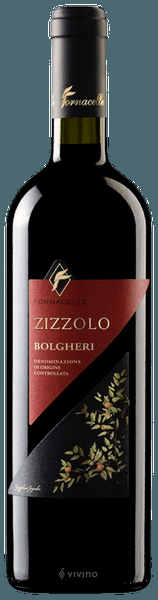

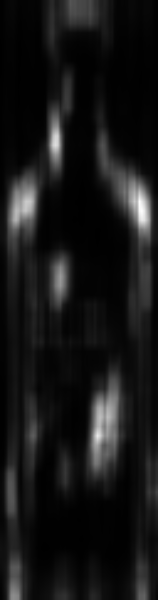

-1

In [ ]:
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")
cv2_imshow(image)
cv2_imshow(saliencyMap)
cv2.waitKey(0)


In [ ]:
import math
import numpy as np

In [ ]:
am = np.argmax(saliencyMap)
xmax = am % saliencyMap.shape[1]
ymax = math.ceil(am / saliencyMap.shape[1])

In [ ]:
print(xmax, ymax)

139 202


In [ ]:
saliencyMap.shape

(600, 158)

In [ ]:
df

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,8.665253e+22,72.145970,101.875833,1.0,0.105306,22.690002,1,1.422962e-09,28628.411530,95274.532901,14.256713,3.174525
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,5.296501e+121,74.638879,83.735040,1.0,0.072747,27.365681,1,4.251168e-07,10180.439444,75725.680030,20.102225,2.435457
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,6.119993e+03,78.032288,83.519130,1.0,0.058571,39.570771,1,1.177539e-04,17511.647133,100451.267961,17.164650,4.139644
3,Tenuta Tignanello 'Solaia' 1997,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'1997.png,6.119993e+03,78.032288,83.519130,1.0,0.058571,39.570771,1,1.177539e-04,17511.647133,100451.267961,17.164650,4.139644
4,Brunello di Montalcino 2006,https://www.vivino.com/IT/en/poggio-di-sotto-b...,https://images.vivino.com/thumbs/84Zp5lVOQ7mAU...,BrunellodiMontalcino2006.png,8.883642e+03,105.027595,42.909620,1.0,0.024968,20.089674,1,1.644663e-11,13620.021403,116655.836477,49.698736,1.105375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10389,Brunello di Montalcino 1986,https://www.vivino.com/IT/en/col-d-orcia-brune...,https://images.vivino.com/thumbs/e0-o537xSwyW1...,BrunellodiMontalcino1986.png,6.368177e+03,43.979370,143.355681,1.0,0.060823,49.821711,1,2.033550e-03,16957.971921,131261.667917,10.285846,0.879551
10390,Brunello di Montalcino Riserva 2004,https://www.vivino.com/IT/en/la-magia-brunello...,https://images.vivino.com/thumbs/grleX6ByT2CGv...,BrunellodiMontalcinoRiserva2004.png,5.162357e+03,36.663163,71.780281,1.0,0.057942,22.222543,1,7.118301e-08,4887.794137,130025.258745,26.212637,2.211639
10391,Brunello di Montalcino Riserva 2007,https://www.vivino.com/IT/en/la-magia-brunello...,https://images.vivino.com/thumbs/grleX6ByT2CGv...,BrunellodiMontalcinoRiserva2007.png,5.162357e+03,36.663163,71.780281,1.0,0.057942,22.222543,1,7.118301e-08,4887.794137,130025.258745,26.212637,2.211639
10392,Brunello di Montalcino 2001,https://www.vivino.com/IT/en/salvioni-maria-gr...,https://images.vivino.com/thumbs/2MbLJKsMShaVW...,BrunellodiMontalcino2001.png,5.459585e+03,35.922278,52.738618,1.0,0.030032,21.301062,1,1.280908e-06,15912.993428,120526.406793,32.651197,4.451711


In [ ]:
mh_dist_1 = abs(saliencyMap.shape[1] - xmax - saliencyMap.shape[1]*ymax/saliencyMap.shape[0])
mh_dist_0 = abs(saliencyMap.shape[0] - ymax - saliencyMap.shape[0]*xmax/saliencyMap.shape[1])
mh_dist = mh_dist_1 + mh_dist_0
mh_dist
print(mh_dist_1, mh_dist_0, abs(saliencyMap.shape[1]*ymax/saliencyMap.shape[0] - xmax), abs(saliencyMap.shape[1]*ymax/saliencyMap.shape[0] - ymax))

34.193333333333335 129.84810126582283 85.80666666666667 148.80666666666667


In [ ]:
def diag_dom(name):
  image = cv2.imread("/content/content/images_tuscany/" + name)
  saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
  (success, saliencyMap) = saliency.computeSaliency(image)
  saliencyMap = (saliencyMap * 255).astype("uint8")
  am = np.argmax(saliencyMap)
  xmax = am % saliencyMap.shape[1]
  ymax = math.ceil(am / saliencyMap.shape[1])
  mh_dist_1 = abs(saliencyMap.shape[1] - xmax - saliencyMap.shape[1]*ymax/saliencyMap.shape[0])
  mh_dist_0 = abs(saliencyMap.shape[0] - ymax - saliencyMap.shape[0]*xmax/saliencyMap.shape[1])
  mh_dist = mh_dist_1 + mh_dist_0
  mh_dist_1 = abs(saliencyMap.shape[1]*ymax/saliencyMap.shape[0] - xmax)
  mh_dist_0 = abs(saliencyMap.shape[1]*ymax/saliencyMap.shape[0] - ymax)
  mh_dist += mh_dist_0 + mh_dist_1
  return mh_dist

In [ ]:
diag_dom("ZizzoloBolgheri2021.png")

164.04143459915616

In [ ]:
dd = []
for name in names_p:
  dd.append(diag_dom(name))
len(dd)

10394

In [ ]:
df["diagonal_dominance"] = dd
df.head(3)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,8.665253e+22,72.145970,101.875833,1.0,0.105306,22.690002,1,1.422962e-09,28628.411530,95274.532901,14.256713,3.174525,150.848397
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,5.296501e+121,74.638879,83.735040,1.0,0.072747,27.365681,1,4.251168e-07,10180.439444,75725.680030,20.102225,2.435457,445.554545
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,6.119993e+03,78.032288,83.519130,1.0,0.058571,39.570771,1,1.177539e-04,17511.647133,100451.267961,17.164650,4.139644,299.121843


In [ ]:
!unzip images_tuscany.zip

Streaming output truncated to the last 5000 lines.
 extracting: content/images/CàDelPazzoSangiovese-CabernetSauvignon2018.png  
 extracting: content/images/CaseViaSyrah2016.png  
  inflating: content/images/VignetoLaCasucciaChiantiClassicoGranSelezione2004.png  
 extracting: content/images/Kepos2015.png  
  inflating: content/images/BrunellodiMontalcinoMontosoli2011.png  
 extracting: content/images/BiancodiOrmaVermentino2021.png  
  inflating: content/images/SangioveseRosatoToscana2021.png  
  inflating: content/images/PerNonDormire2012.png  
  inflating: content/images/BurianoToscana2017.png  
  inflating: content/images/CaratoVernacciadiSanGimignano2020.png  
 extracting: content/images/PalazziRossoToscana2015.png  
  inflating: content/images/NectarDeiMaremmaToscana2008.png  
  inflating: content/images/OriginiBrunellodiMontalcino2015.png  
 extracting: content/images/PoggioAlVentoBrunellodiMontalcinoRiserva2013.png  
  inflating: content/images/ColtassalaChiantiClassicoGranSelezio

In [ ]:
dd = []
for name in names:
  dd.append(diag_dom(name))
len(dd)

10394

In [ ]:
df["diagonal_dominance"] = dd
df.head(3)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,25000.000000,72.145970,101.875833,1.0,0.105306,22.690002,1,1.422962e-09,28628.411530,95274.532901,14.256713,3.174525,500.848397,0.355158
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,25000.000000,74.638879,83.735040,1.0,0.072747,27.365681,1,4.251168e-07,10180.439444,75725.680030,20.102225,2.435457,801.554545,0.614333
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,6119.993428,78.032288,83.519130,1.0,0.058571,39.570771,1,1.177539e-04,17511.647133,100451.267961,17.164650,4.139644,493.121843,0.346605


In [ ]:
df.to_csv("image_features_tuscany.csv", index=False)

In [ ]:
dfp.to_csv("image_features_piemonte.csv", index=False)

In [ ]:
saliencyMap[ymax][xmax]


253

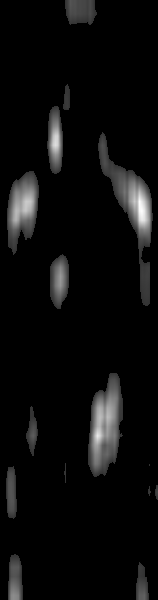

In [ ]:
salm_1 = saliencyMap
for i in range(salm_1.shape[0]):
  for j in range(salm_1.shape[1]):
    if salm_1[i][j] < 50:
      salm_1[i][j]= 0
cv2_imshow(salm_1)

In [ ]:
np.count_nonzero(saliencyMap)/(saliencyMap.shape[0]*saliencyMap.shape[1])

0.1235126582278481

In [ ]:
def f_g_size(name):
  image = cv2.imread("/content/content/images_piemonte/" + name)
  saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
  (success, saliencyMap) = saliency.computeSaliency(image)
  saliencyMap = (saliencyMap * 255).astype("uint8")
  for i in range(saliencyMap.shape[0]):
    for j in range(saliencyMap.shape[1]):
      if saliencyMap[i][j] < 10:
        saliencyMap[i][j]= 0
  return np.count_nonzero(saliencyMap)/(saliencyMap.shape[0]*saliencyMap.shape[1])


In [ ]:
f_g_size("ZizzoloBolgheri2021.png")

0.1235126582278481

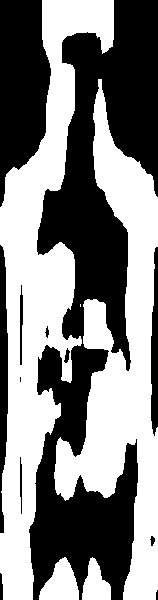

In [ ]:
image = cv2.imread("/content/ZizzoloBolgheri2021.png")
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")
salm_1 = saliencyMap
for i in range(salm_1.shape[0]):
  for j in range(salm_1.shape[1]):
    if salm_1[i][j] < 10:
      salm_1[i][j]= 0
    else:
      salm_1[i][j] = 255
cv2_imshow(salm_1)

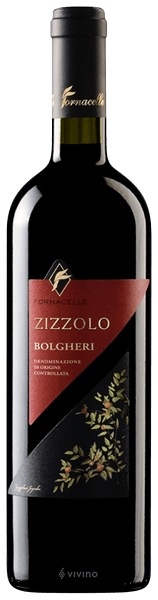

In [ ]:
im = cv2.imread("/content/ZizzoloBolgheri2021.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(im)

In [ ]:
fgsize = []
count = 0
for name in names:
  fgsize.append(f_g_size(name))
  if count % 100 == 0:
    print(count)
  count += 1
len(fgsize)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300


10394

In [ ]:
df["figure_ground_size"] = fgsize
df.head(4)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,8.665253e+22,72.145970,101.875833,1.0,0.105306,22.690002,1,1.422962e-09,28628.411530,95274.532901,14.256713,3.174525,150.848397,0.355158
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,5.296501e+121,74.638879,83.735040,1.0,0.072747,27.365681,1,4.251168e-07,10180.439444,75725.680030,20.102225,2.435457,445.554545,0.614333
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,6.119993e+03,78.032288,83.519130,1.0,0.058571,39.570771,1,1.177539e-04,17511.647133,100451.267961,17.164650,4.139644,299.121843,0.346605
3,Tenuta Tignanello 'Solaia' 1997,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'1997.png,6.119993e+03,78.032288,83.519130,1.0,0.058571,39.570771,1,1.177539e-04,17511.647133,100451.267961,17.164650,4.139644,299.121843,0.346605


In [ ]:
df.to_csv("image_features_tuscany.csv", index=False)

In [ ]:
names_p = dfp.image_names.to_list()
len(names_p)

5933

In [ ]:
fgsize = []
count = 0
for name in names_p:
  fgsize.append(f_g_size(name))
  if count % 100 == 0:
    print(count)
  count += 1
len(fgsize)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


5933

In [ ]:
dfp["figure_ground_size"] = fgsize
dfp.head(2)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,5.738831e+03,89.585949,150.137468,1.0,0.064641,48.594532,1,4.263727e-07,27407.775897,70753.508565,7.012457,0.342364,267.794684,0.376551
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,2.584170e+189,96.286447,79.322088,1.0,0.038956,21.756336,1,6.899074e-11,13100.455965,108044.819368,17.422752,2.892335,224.110526,0.601842


In [ ]:
dfp.to_csv("image_features_piemonte.csv", index=False)

In [ ]:
temp = dfp.temperature.to_list()

In [ ]:
for i in range(len(temp)):
  if temp[i] > 25000:
    temp[i] = 25000

In [ ]:
max(temp)

25000

In [ ]:
dfp.temperature = temp

In [ ]:
dfp.head(3)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,...,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,5738.831099,89.585949,150.137468,1.000000,0.064641,48.594532,...,4.263727e-07,27407.775897,70753.508565,7.012457,0.342364,267.794684,0.376551,3.25,3.3,3.295238
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,25000.000000,96.286447,79.322088,1.000000,0.038956,21.756336,...,6.899074e-11,13100.455965,108044.819368,17.422752,2.892335,224.110526,0.601842,5.50,3.9,3.891083
2,Il Sendallo Chardonnay 2022,https://www.vivino.com/IT/en/cantine-povero-as...,IlSendalloChardonnay2022.png,https://images.vivino.com/thumbs/CdCmqwMpSXmAm...,6551.379253,80.487722,134.599357,0.905882,0.094631,63.609181,...,4.130261e-08,38979.078914,114233.925654,1.810794,0.281566,189.244135,0.572162,5.80,0.0,3.648175


In [ ]:
temp = dfp.temperature.to_list()

In [ ]:
for i in range(len(temp)):
  if temp[i] > 25000:
    temp[i] = 25000

In [ ]:
dfp.temperature = temp
dfp.head(3)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,5738.831099,89.585949,150.137468,1.000000,0.064641,48.594532,1,4.263727e-07,27407.775897,70753.508565,7.012457,0.342364,267.794684,0.376551
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,25000.000000,96.286447,79.322088,1.000000,0.038956,21.756336,1,6.899074e-11,13100.455965,108044.819368,17.422752,2.892335,224.110526,0.601842
2,Il Sendallo Chardonnay 2022,https://www.vivino.com/IT/en/cantine-povero-as...,IlSendalloChardonnay2022.png,https://images.vivino.com/thumbs/CdCmqwMpSXmAm...,6551.379253,80.487722,134.599357,0.905882,0.094631,63.609181,1,4.130261e-08,38979.078914,114233.925654,1.810794,0.281566,189.244135,0.572162


In [ ]:
!unzip all_piemonte_wines.zip

Archive:  all_piemonte_wines.zip
  inflating: all_piemonte_wines.csv  


In [ ]:
dfp_rev = pd.read_csv("all_piemonte_wines.csv",sep=";")
dfp_rev

<ipython-input-46-f1c1c2f72f24>:1: DtypeWarning: Columns (10,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  dfp_rev = pd.read_csv("all_piemonte_wines.csv",sep=";")


,Winery,Wine,Rating,num_review,Wine type,Wine region,Country,Grape,price,link,...,Wine ID,User's Grade,CreatedAt,user id,followers,following,User Ratings,language,label,image_name
0,Umi,White Sushi Wine N.V.,3.3,86,White,Italy Piemonte,it,Sangiovese Chardonnay,3.25,https://www.vivino.com/IT/en/umi-white-sushi-w...,...,3830847,3.5,2017-06-21T12:19:09.000Z,2226059,13,22,237,en,umi-white-sushi-wine-2014,images/WhiteSushiWineN.V..png
1,Umi,White Sushi Wine N.V.,3.3,86,White,Italy Piemonte,it,Sangiovese Chardonnay,3.25,https://www.vivino.com/IT/en/umi-white-sushi-w...,...,3830847,3.5,2018-07-19T16:54:41.000Z,6676901,363,152,1566,en,umi-white-sushi-wine-2016,images/WhiteSushiWineN.V..png
2,Umi,White Sushi Wine N.V.,3.3,86,White,Italy Piemonte,it,Sangiovese Chardonnay,3.25,https://www.vivino.com/IT/en/umi-white-sushi-w...,...,3830847,2.4,2023-06-25T15:15:10.000Z,39047501,1,5,158,es,umi-white-sushi-wine-nv,images/WhiteSushiWineN.V..png


In [ ]:
name = "NebbioloLanghe2012.png"
dfp_rev[dfp_rev["image_name"] == "images/" + name].price.to_list()[0]

151.2

In [ ]:
dfp_rev

,Winery,Wine,Rating,num_review,Wine type,Wine region,Country,Grape,price,link,...,Wine ID,User's Grade,CreatedAt,user id,followers,following,User Ratings,language,label,image_name
0,Umi,White Sushi Wine N.V.,3.3,86,White,Italy Piemonte,it,Sangiovese Chardonnay,3.25,https://www.vivino.com/IT/en/umi-white-sushi-w...,...,3830847,3.5,2017-06-21T12:19:09.000Z,2226059,13,22,237,en,umi-white-sushi-wine-2014,images/WhiteSushiWineN.V..png
1,Umi,White Sushi Wine N.V.,3.3,86,White,Italy Piemonte,it,Sangiovese Chardonnay,3.25,https://www.vivino.com/IT/en/umi-white-sushi-w...,...,3830847,3.5,2018-07-19T16:54:41.000Z,6676901,363,152,1566,en,umi-white-sushi-wine-2016,images/WhiteSushiWineN.V..png
2,Umi,White Sushi Wine N.V.,3.3,86,White,Italy Piemonte,it,Sangiovese Chardonnay,3.25,https://www.vivino.com/IT/en/umi-white-sushi-w...,...,3830847,2.4,2023-06-25T15:15:10.000Z,39047501,1,5,158,es,umi-white-sushi-wine-nv,images/WhiteSushiWineN.V..png
3,Umi,White Sushi Wine N.V.,3.3,86,White,Italy Piemonte,it,Sangiovese Chardonnay,3.25,https://www.vivino.com/IT/en/umi-white-sushi-w...,...,3830847,3.0,2018-03-03T02:31:53.000Z,14014519,1269,142,2544,un,umi-white-sushi-wine-nv,images/WhiteSushiWineN.V..png
4,Umi,White Sushi Wine N.V.,3.3,86,White,Italy Piemonte,it,Sangiovese Chardonnay,3.25,https://www.vivino.com/IT/en/umi-white-sushi-w...,...,3830847,3.8,2023-09-01T12:07:35.000Z,37797756,5,6,131,es,umi-white-sushi-wine-nv,images/WhiteSushiWineN.V..png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160188,Azienda Agricola Monchiero,Nebbiolo Langhe 2012,0.0,16,Red,Italy Langhe,it,Sangiovese Chardonnay,151.20,https://www.vivino.com/IT/en/monchiero-nebbiol...,...,17786,5.0,2021-12-05T17:34:51.000Z,54210324,4,3,14,un,monchiero-nebbiolo-langhe-2020,images/NebbioloLanghe2012.png
4160189,Azienda Agricola Monchiero,Nebbiolo Langhe 2012,0.0,16,Red,Italy Langhe,it,Sangiovese Chardonnay,151.20,https://www.vivino.com/IT/en/monchiero-nebbiol...,...,17786,5.0,2019-01-07T19:24:00.000Z,19415306,2,1,110,da,monchiero-nebbiolo-langhe-2016,images/NebbioloLanghe2012.png
4160190,Azienda Agricola Monchiero,Nebbiolo Langhe 2012,0.0,16,Red,Italy Langhe,it,Sangiovese Chardonnay,151.20,https://www.vivino.com/IT/en/monchiero-nebbiol...,...,17786,1.0,2021-03-20T18:57:01.000Z,27705448,0,0,6,it,monchiero-nebbiolo-langhe-2017,images/NebbioloLanghe2012.png
4160191,Azienda Agricola Monchiero,Nebbiolo Langhe 2012,0.0,16,Red,Italy Langhe,it,Sangiovese Chardonnay,151.20,https://www.vivino.com/IT/en/monchiero-nebbiol...,...,17786,5.0,2021-05-22T18:56:56.000Z,50064179,0,0,9,un,monchiero-nebbiolo-langhe-2019,images/NebbioloLanghe2012.png


In [ ]:
pr = []
count = 0
for name in names_p:
  pr.append(dfp_rev[dfp_rev["image_name"] == "images/" + name].price.to_list()[0])
  if count % 100 == 0:
    print(count)
  count += 1
len(pr)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


5933

In [ ]:
len(pr)

1

In [ ]:
dfp_rev.describe()

,Rating,num_review,price,Wine ID,User's Grade,user id
count,4.160193e+06,4.160193e+06,4.160193e+06,4.160193e+06,4.160193e+06,4.160193e+06
mean,3.447139e+00,4.138645e+02,1.609313e+02,7.468209e+05,4.144626e+00,1.606182e+07
std,1.612293e+00,6.913545e+02,3.656684e+02,1.278141e+06,6.568846e-01,1.546690e+07
min,0.000000e+00,0.000000e+00,3.250000e+00,1.787000e+03,1.000000e+00,0.000000e+00
25%,3.900000e+00,4.400000e+01,3.400000e+01,3.935400e+04,4.000000e+00,3.451228e+06
50%,4.100000e+00,1.450000e+02,9.500000e+01,7.997000e+04,4.000000e+00,9.969923e+06
75%,4.300000e+00,4.300000e+02,1.699000e+02,1.187207e+06,4.500000e+00,2.573920e+07
max,4.800000e+00,6.016000e+03,2.197000e+04,1.167750e+07,5.000000e+00,6.563335e+07


In [ ]:
dfp["price"] = pr
dfp.head(4)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,5738.831099,89.585949,150.137468,1.000000,0.064641,48.594532,1,4.263727e-07,27407.775897,70753.508565,7.012457,0.342364,652.794684,0.376551,3.25
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,25000.000000,96.286447,79.322088,1.000000,0.038956,21.756336,1,6.899074e-11,13100.455965,108044.819368,17.422752,2.892335,368.910526,0.601842,5.50
2,Il Sendallo Chardonnay 2022,https://www.vivino.com/IT/en/cantine-povero-as...,IlSendalloChardonnay2022.png,https://images.vivino.com/thumbs/CdCmqwMpSXmAm...,6551.379253,80.487722,134.599357,0.905882,0.094631,63.609181,1,4.130261e-08,38979.078914,114233.925654,1.810794,0.281566,555.244135,0.572162,5.80
3,Buon Paggio Grignolino Piemonte 2022,https://www.vivino.com/IT/en/cantine-povero-as...,BuonPaggioGrignolinoPiemonte2022.png,https://images.vivino.com/thumbs/59Y0FaE4SAmup...,7134.342088,52.777236,107.454810,0.958848,0.062669,27.095146,1,5.161947e-05,44844.128333,79408.001951,6.108936,0.951504,590.955485,0.552131,5.80


In [ ]:
rating = []
grade = []
count = 0
for name in names_p:
  rating.append(dfp_rev[dfp_rev["image_name"] == "images/" + name].Rating.to_list()[0])
  gr = dfp_rev[dfp_rev["image_name"] == "images/" + name]["User's Grade"].to_list()
  grade.append(sum(gr)/len(gr))
  if count % 100 == 0:
    print(count)
  count += 1
len(rating)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700


In [ ]:
dft.to_csv("image_features_tuscany.csv", index=False)

In [ ]:
dfp.to_csv("image_features_piemonte.csv", index=False)

In [2]:
import argparse
import cv2

In [3]:
ap = argparse.ArgumentParser()

In [4]:
from google.colab.patches import cv2_imshow

In [5]:
image = cv2.imread("/content/CampomaccioneRosato2019.png")

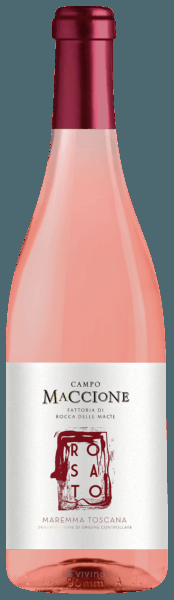

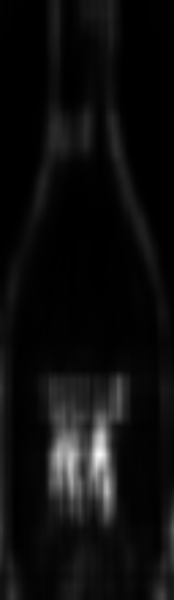

-1

In [6]:
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")
cv2_imshow(image)
cv2_imshow(saliencyMap)
cv2.waitKey(0)


In [8]:
name = "/content/CampomaccioneRosato2019.png"

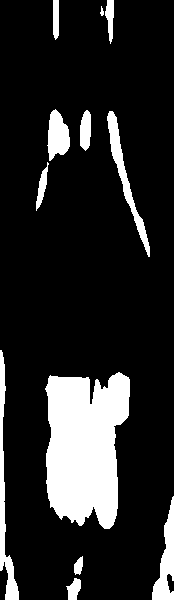

In [11]:
image = cv2.imread(name)
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")
salm_1 = saliencyMap
for i in range(salm_1.shape[0]):
  for j in range(salm_1.shape[1]):
    if salm_1[i][j] < 25:
      salm_1[i][j]= 0
    else:
      salm_1[i][j] = 255
cv2_imshow(salm_1)

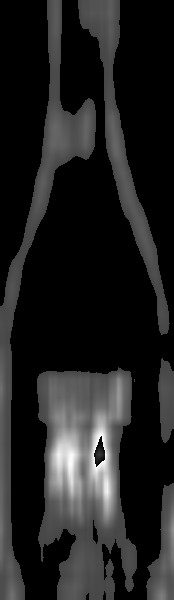

In [16]:
image = cv2.imread(name)
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")
salm_1 = saliencyMap
for i in range(salm_1.shape[0]):
  for j in range(salm_1.shape[1]):
    if salm_1[i][j] < 10:
      salm_1[i][j]= 0
    else:
      salm_1[i][j] += 60
cv2_imshow(salm_1)